# **02 — Exploratory Data Analysis (EDA)**

# 1. Objective of Exploratory Analysis

The purpose of this notebook is to understand the structure, distributions, and relationships within the data prior to any feature engineering or predictive modeling.

Specifically, this exploratory analysis aims to:

* Understand the distribution of the target variable and assess class imbalance
* Explore numerical feature distributions and their relationship with subscription outcome
* Analyze categorical variables and identify high-impact segments
* Extract business-relevant insights to guide feature selection and modeling decisions

No transformations, encoding, or model training are performed in this notebook.

## 2. Dataset Loading

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set_style("whitegrid")

# Load dataset
df = pd.read_csv(
    "data/bank-additional-full.csv",
    sep=";"
)

# 3. Target Variable Analysis

## 3.1 Class Distribution

In [14]:
# Absolute and relative distribution of the target variable
target_counts = df['y'].value_counts()
target_percentage = df['y'].value_counts(normalize=True) * 100

print("Target Variable Distribution (y):")
display(
    pd.DataFrame({
        "count": target_counts,
        "percentage (%)": target_percentage.round(2)
    })
)

Target Variable Distribution (y):


,count,percentage (%)
y,,
no,36548,88.73
yes,4640,11.27


*Key Insight*<br>
The dataset is strongly imbalanced:

* ~88.7% non-subscribers (no)
* ~11.3% subscribers (yes)

Accuracy alone will be an unreliable evaluation metric for predictive models.

# 4. Numerical Feature Analysis

## 4.1 Descriptive Statistics

In [15]:
numeric_vars = ['age', 'duration', 'campaign', 'pdays']
df[numeric_vars].describe()

,age,duration,campaign,pdays
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454
std,10.42125,259.279249,2.770014,186.910907
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000
50%,38.00000,180.000000,2.000000,999.000000
75%,47.00000,319.000000,3.000000,999.000000
max,98.00000,4918.000000,56.000000,999.000000


*Observations*

* Average client age is ~40 years, with a wide range (17–98).
* Call duration shows high variance and extreme values.
* Most clients are contacted three times or fewer.
* The value `pdays = 999` dominates, indicating no previous contact.

## 4.2 Distribution of Numerical Variables

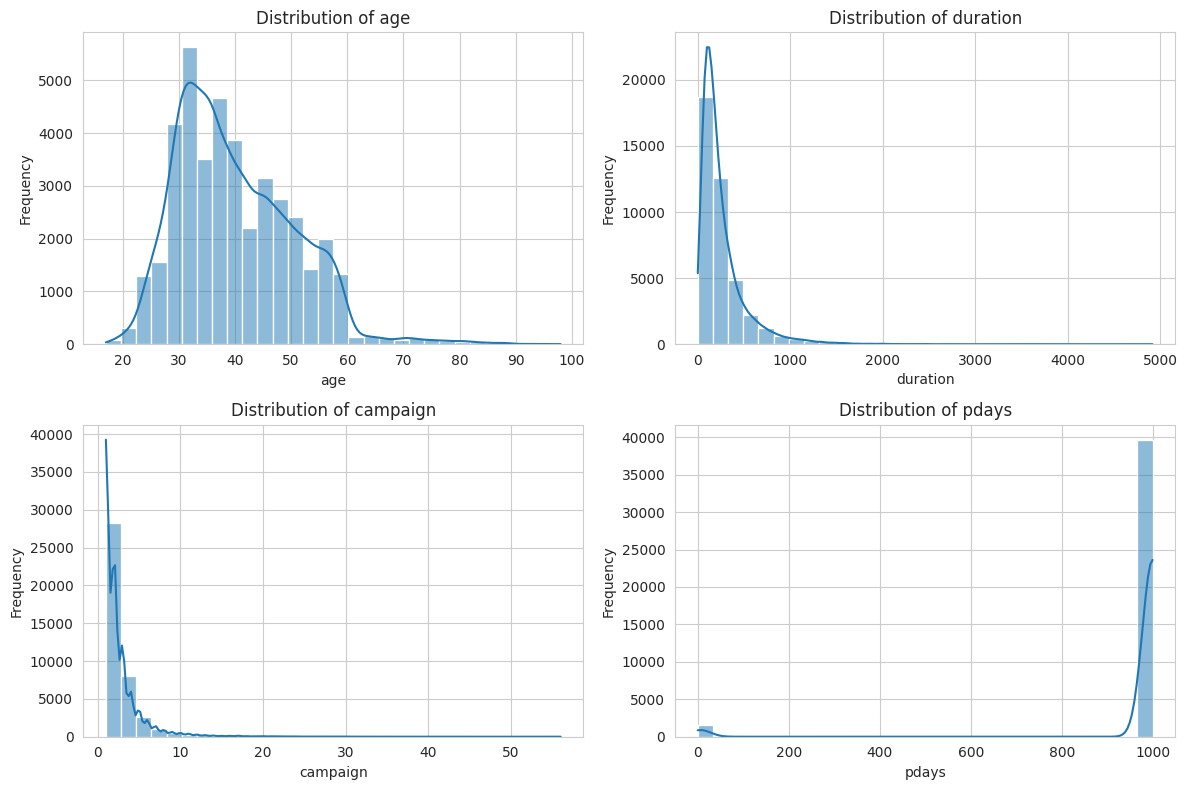

In [16]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## 4.3 Numerical Variables by Subscription Outcome

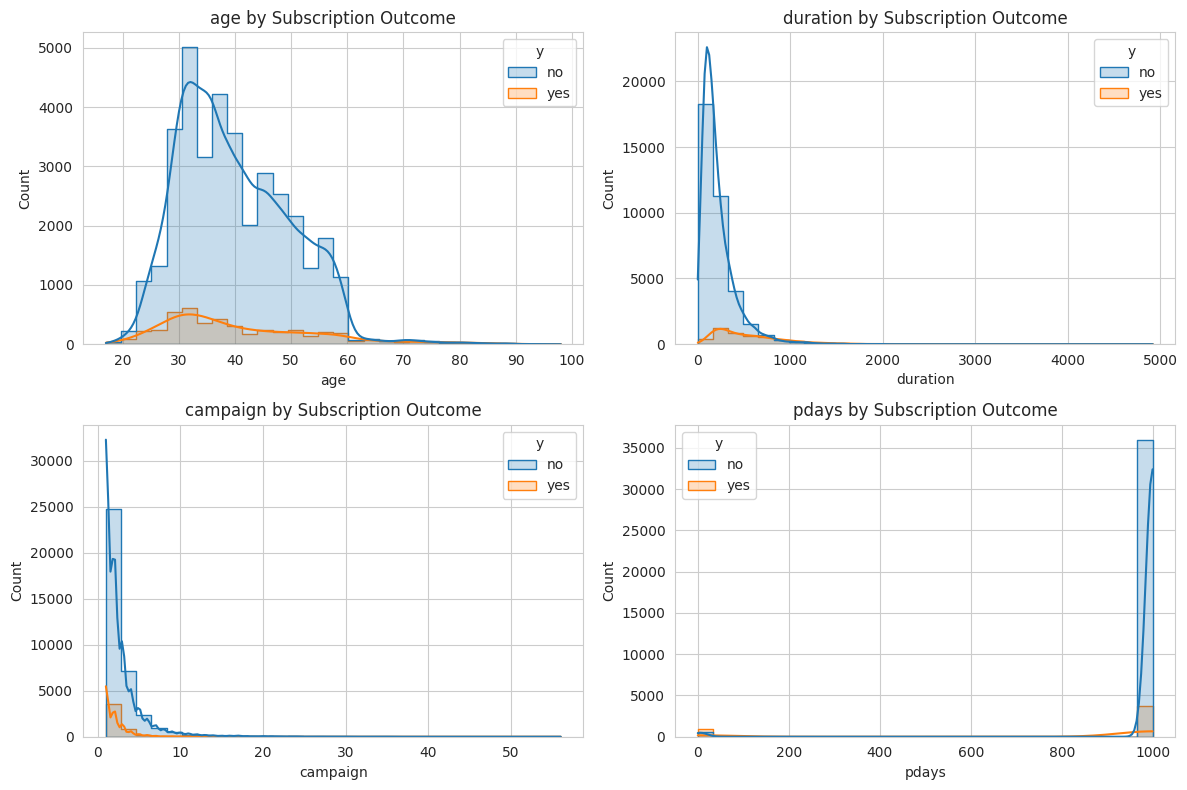

In [17]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=df,
        x=col,
        hue='y',
        bins=30,
        kde=True,
        element='step'
    )
    plt.title(f"{col} by Subscription Outcome")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


## 4.4 Boxplots by Subscription Outcome

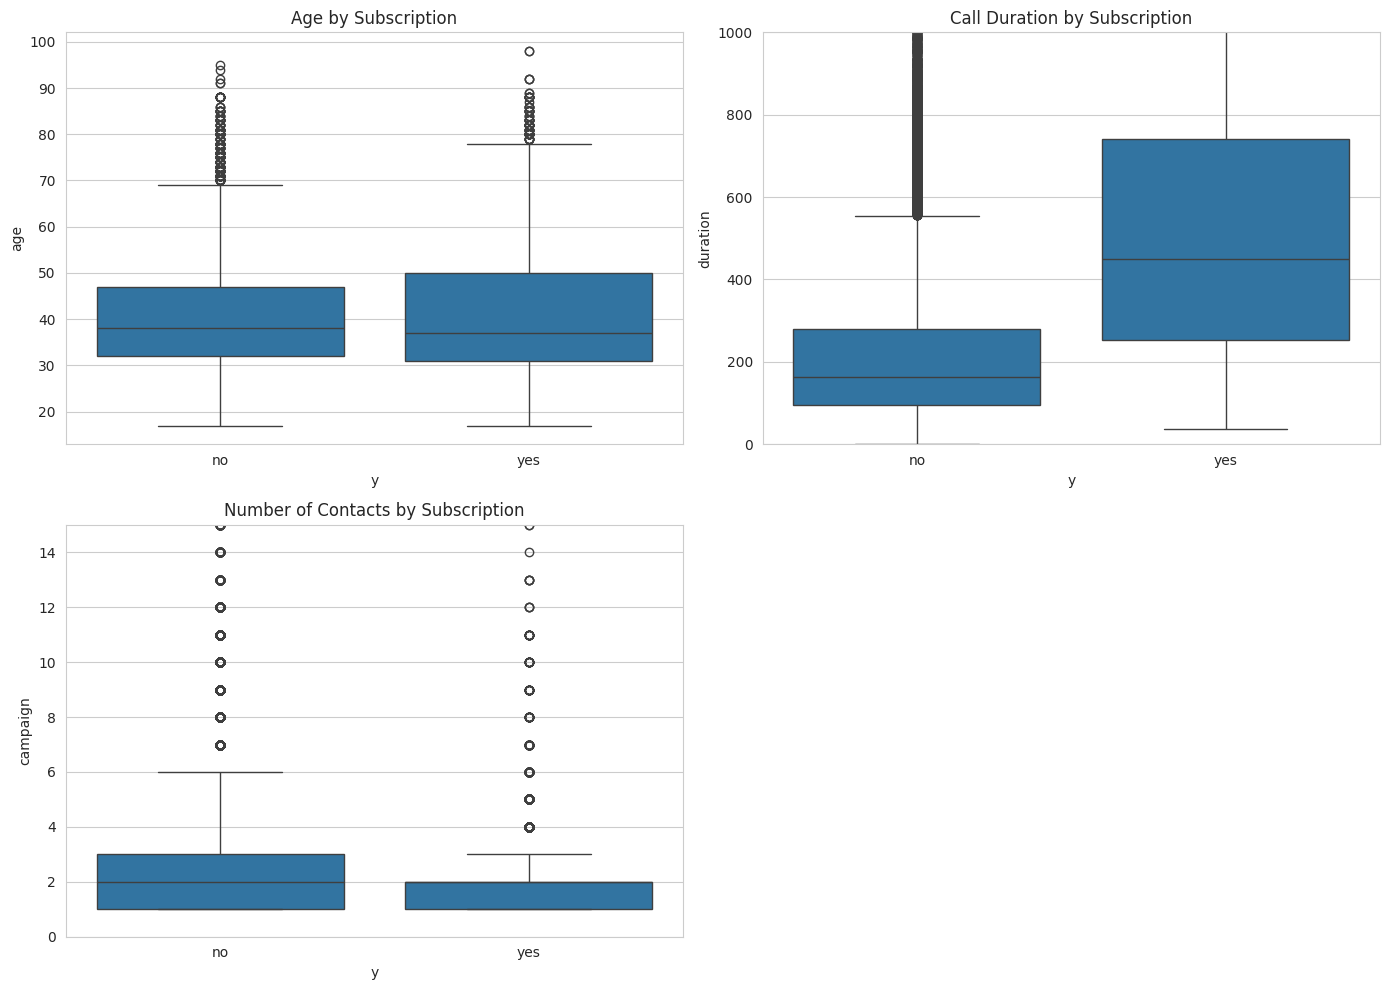

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

sns.boxplot(x='y', y='age', data=df, ax=axes[0])
axes[0].set_title("Age by Subscription")

sns.boxplot(x='y', y='duration', data=df, ax=axes[1])
axes[1].set_ylim(0, 1000)
axes[1].set_title("Call Duration by Subscription")

sns.boxplot(x='y', y='campaign', data=df, ax=axes[2])
axes[2].set_ylim(0, 15)
axes[2].set_title("Number of Contacts by Subscription")

axes[3].axis('off')

plt.tight_layout()
plt.show()


*Key Insight*
* Age shows only a mild difference between subscribers and non-subscribers.
* Call duration strongly differentiates outcomes (longer calls → higher success).
* Fewer contact attempts correlate with higher conversion rates.

# 5. Categorical Feature Analysis

## 5.1 Unique Categories and Informative Missing Values

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col.upper()} ({df[col].nunique()} categories):")
    print(df[col].unique())



JOB (12 categories):
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

MARITAL (4 categories):
['married' 'single' 'divorced' 'unknown']

EDUCATION (8 categories):
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

DEFAULT (3 categories):
['no' 'unknown' 'yes']

HOUSING (3 categories):
['no' 'yes' 'unknown']

LOAN (3 categories):
['no' 'yes' 'unknown']

CONTACT (2 categories):
['telephone' 'cellular']

MONTH (10 categories):
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

DAY_OF_WEEK (5 categories):
['mon' 'tue' 'wed' 'thu' 'fri']

POUTCOME (3 categories):
['nonexistent' 'failure' 'success']

Y (2 categories):
['no' 'yes']


*Observation*
* Several variables include values such as "unknown" or "nonexistent".
* These represent informative missing values, not technical nulls.

## 5.2 Conversion Rates by Categorical Variables

In [20]:
categorical_vars = ['job', 'marital', 'education', 'housing', 'loan']

for col in categorical_vars:
    print("=" * 80)
    print(f"Conversion Rate by {col.upper()}")
    display(
        pd.crosstab(df[col], df['y'], normalize='index') * 100
    )


Conversion Rate by JOB


y,no,yes
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


Conversion Rate by MARITAL


y,no,yes
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


Conversion Rate by EDUCATION


y,no,yes
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


Conversion Rate by HOUSING


y,no,yes
housing,,
no,89.120395,10.879605
unknown,89.191919,10.808081
yes,88.380608,11.619392


Conversion Rate by LOAN


y,no,yes
loan,,
no,88.659794,11.340206
unknown,89.191919,10.808081
yes,89.068502,10.931498


## 5.3 Segment Size vs. Conversion Rate

In [21]:
results = {}

for var in categorical_vars:
    table = pd.crosstab(df[var], df['y'], normalize='index') * 100
    freq_abs = df[var].value_counts()
    freq_rel = df[var].value_counts(normalize=True) * 100

    summary = pd.concat([freq_abs, freq_rel, table], axis=1)
    summary.columns = ['count', 'population_pct', 'no_pct', 'yes_pct']
    results[var] = summary.sort_values('count', ascending=False)

for var, table in results.items():
    print("=" * 80)
    print(f"VARIABLE: {var.upper()}")
    display(table)


VARIABLE: JOB


,count,population_pct,no_pct,yes_pct
job,,,,
admin.,10422,25.303486,87.027442,12.972558
blue-collar,9254,22.467709,93.105684,6.894316
technician,6743,16.371273,89.173958,10.826042
services,3969,9.636302,91.861930,8.138070
management,2924,7.099155,88.782490,11.217510
retired,1720,4.175974,74.767442,25.232558
entrepreneur,1456,3.535010,91.483516,8.516484
self-employed,1421,3.450034,89.514426,10.485574
housemaid,1060,2.573565,90.000000,10.000000


VARIABLE: MARITAL


,count,population_pct,no_pct,yes_pct
marital,,,,
married,24928,60.522482,89.842747,10.157253
single,11568,28.085850,85.995851,14.004149
divorced,4612,11.197436,89.679098,10.320902
unknown,80,0.194231,85.000000,15.000000


VARIABLE: EDUCATION


,count,population_pct,no_pct,yes_pct
education,,,,
university.degree,12168,29.542585,86.275477,13.724523
high.school,9515,23.101389,89.164477,10.835523
basic.9y,6045,14.676605,92.175352,7.824648
professional.course,5243,12.729436,88.651535,11.348465
basic.4y,4176,10.138875,89.750958,10.249042
basic.6y,2292,5.564728,91.797557,8.202443
unknown,1731,4.202680,85.499711,14.500289
illiterate,18,0.043702,77.777778,22.222222


VARIABLE: HOUSING


,count,population_pct,no_pct,yes_pct
housing,,,,
yes,21576,52.384190,88.380608,11.619392
no,18622,45.212198,89.120395,10.879605
unknown,990,2.403613,89.191919,10.808081


VARIABLE: LOAN


,count,population_pct,no_pct,yes_pct
loan,,,,
no,33950,82.426920,88.659794,11.340206
yes,6248,15.169467,89.068502,10.931498
unknown,990,2.403613,89.191919,10.808081


**Business Insight**
* Groups such as student and retired show the highest conversion rates.
* However, their population size is small.
* Larger segments (e.g., admin., blue-collar) offer higher overall business impact despite lower conversion rates.

# 6. Effect of Previous Campaign Outcome

In [22]:
poutcome_table = pd.crosstab(
    df['poutcome'], df['y'], normalize='index'
) * 100

poutcome_table


y,no,yes
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167787,8.832213
success,34.887109,65.112891


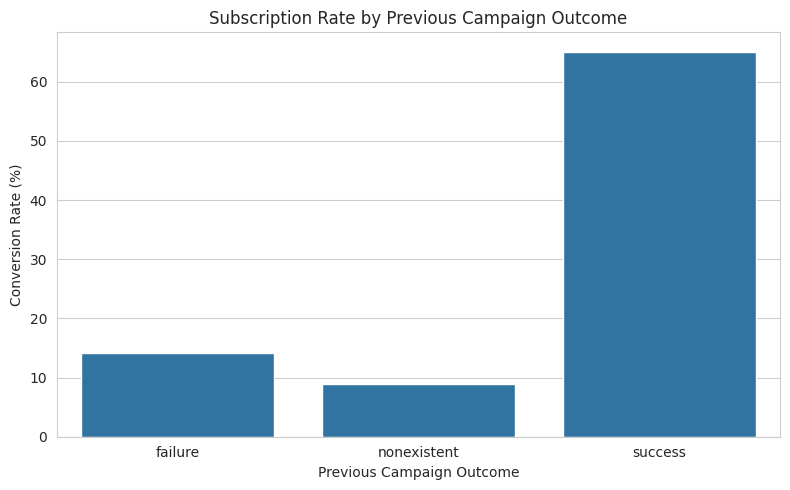

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=poutcome_table.index,
    y=poutcome_table['yes']
)
plt.title("Subscription Rate by Previous Campaign Outcome")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Previous Campaign Outcome")
plt.tight_layout()
plt.show()


*Key Insight*

* A previous successful campaign dramatically increases the likelihood of future subscription.
* This variable is expected to be highly predictive in downstream models.

# 7. Summary of EDA Findings

The exploratory analysis reveals several important patterns:
* The target variable is highly imbalanced (~11% positive class).
* Call duration is the most discriminative feature, but poses a data leakage risk.
* Repeated contact attempts reduce conversion likelihood.
* Previous campaign success is a strong indicator of future acceptance.
* High-conversion segments may not correspond to the largest populations.

These findings directly inform feature engineering choices and model design decisions.